In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Lectura de archivos

In [2]:
df = pd.read_csv('../datasets/owid-covid-data.csv', parse_dates=['date'])

In [3]:
df.info

<bound method DataFrame.info of        iso_code continent     location       date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan 2020-02-24          1.0        1.0   
1           AFG      Asia  Afghanistan 2020-02-25          1.0        0.0   
2           AFG      Asia  Afghanistan 2020-02-26          1.0        0.0   
3           AFG      Asia  Afghanistan 2020-02-27          1.0        0.0   
4           AFG      Asia  Afghanistan 2020-02-28          1.0        0.0   
...         ...       ...          ...        ...          ...        ...   
103607      ZWE    Africa     Zimbabwe 2021-07-15      78872.0     2491.0   
103608      ZWE    Africa     Zimbabwe 2021-07-16      81168.0     2296.0   
103609      ZWE    Africa     Zimbabwe 2021-07-17      82613.0     1445.0   
103610      ZWE    Africa     Zimbabwe 2021-07-18      83619.0     1006.0   
103611      ZWE    Africa     Zimbabwe 2021-07-19      85732.0     2113.0   

        new_cases_smoothed  total_deaths  n

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [5]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [6]:
len(df.columns)

60

In [3]:
df.drop(['new_cases_smoothed','new_deaths_smoothed','new_cases_smoothed_per_million','new_deaths_smoothed_per_million','new_vaccinations_smoothed','new_vaccinations_smoothed_per_million','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers'],axis=1,inplace=True)

In [20]:
df_copia = df.copy()

In [34]:
df_copia['location'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [5]:
countries_of_interest = ['Ecuador', 'Peru', 'Colombia', 'España', 'Rusia', 'Panama', 'China', 'United States']

In [6]:
 df_countries = df.loc[df['location'].isin(countries_of_interest)]
 df_countries

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
19476,CHN,Asia,China,2020-01-22,548.0,NaN,17.0,NaN,0.381,NaN,...,38.7,10.641,5.929,15308.712,0.7,NaN,4.34,76.91,0.761,NaN
19477,CHN,Asia,China,2020-01-23,641.0,93.0,18.0,1.0,0.445,0.065,...,38.7,10.641,5.929,15308.712,0.7,NaN,4.34,76.91,0.761,NaN
19478,CHN,Asia,China,2020-01-24,918.0,277.0,26.0,8.0,0.638,0.192,...,38.7,10.641,5.929,15308.712,0.7,NaN,4.34,76.91,0.761,NaN
19479,CHN,Asia,China,2020-01-25,1401.0,483.0,42.0,16.0,0.973,0.336,...,38.7,10.641,5.929,15308.712,0.7,NaN,4.34,76.91,0.761,NaN
19480,CHN,Asia,China,2020-01-26,2067.0,666.0,56.0,14.0,1.436,0.463,...,38.7,10.641,5.929,15308.712,0.7,NaN,4.34,76.91,0.761,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98731,USA,North America,United States,2021-07-15,33975642.0,28412.0,608424.0,283.0,102644.623,85.836,...,38.3,15.413,9.732,54225.446,1.2,NaN,2.77,78.86,0.926,NaN
98732,USA,North America,United States,2021-07-16,34054952.0,79310.0,608815.0,391.0,102884.229,239.605,...,38.3,15.413,9.732,54225.446,1.2,NaN,2.77,78.86,0.926,NaN
98733,USA,North America,United States,2021-07-17,34067912.0,12960.0,608884.0,69.0,102923.382,39.154,...,38.3,15.413,9.732,54225.446,1.2,NaN,2.77,78.86,0.926,NaN
98734,USA,North America,United States,2021-07-18,34079960.0,12048.0,609019.0,135.0,102959.781,36.399,...,38.3,15.413,9.732,54225.446,1.2,NaN,2.77,78.86,0.926,NaN


In [11]:
df_countries.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_

In [12]:
len(df_countries.columns)

50

In [13]:
df_countries.shape

(3156, 50)

In [14]:
df_countries.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,3.095000e+03,3093.000000,3027.000000,3026.000000,3095.000000,3093.000000,3027.000000,3026.000000,2992.000000,368.000000,...,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,1007.000000,3156.000000,3156.000000,3156.000000,298.000000
mean,2.968295e+06,13538.300356,75393.943508,315.437541,25541.812746,123.932532,961.956078,4.249674,1.092677,12854.899457,...,32.772972,9.372489,5.689322,21497.174166,2.588942,73.048357,2.387091,77.545349,0.801490,68.938859
std,7.583029e+06,35237.715945,139009.302739,595.792233,30031.962241,156.130686,1204.944465,6.811556,0.340824,7220.141306,...,4.334623,3.015131,1.927954,15391.032482,1.365637,7.628195,0.997247,0.828740,0.059792,77.252873
min,1.000000e+00,-7953.000000,1.000000,-679.000000,0.003000,-450.772000,0.003000,-20.593000,0.190000,3522.000000,...,28.100000,7.104000,4.312000,10581.936000,0.700000,65.386000,1.500000,76.740000,0.759000,-95.590000
25%,8.492550e+04,112.000000,4634.000000,6.000000,246.702500,1.847000,22.004500,0.340000,0.950000,8290.500000,...,29.100000,7.151000,4.455000,12236.706000,1.200000,65.386000,1.600000,76.910000,0.761000,20.730000
50%,2.813530e+05,1146.000000,12542.000000,47.500000,13724.717000,77.308000,635.768000,2.348500,1.040000,9864.500000,...,32.200000,7.918000,5.030000,15308.712000,2.200000,80.635000,2.300000,77.010000,0.777000,42.705000
75%,1.431538e+06,8447.000000,85763.500000,400.000000,40392.715000,172.337000,1382.345500,5.214750,1.152500,16265.000000,...,38.300000,10.641000,5.929000,22267.037000,3.600000,80.635000,2.770000,78.510000,0.815000,81.685000
max,3.413207e+07,300462.000000,609231.000000,4461.000000,103117.215000,1201.919000,5921.506000,218.329000,3.660000,28889.000000,...,38.700000,15.413000,9.732000,54225.446000,4.500000,80.635000,4.340000,78.860000,0.926000,410.120000


In [21]:
df_copia.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,0.026,0.026,...,18.6,2.581,1.337,1803.987,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,0.026,0.000,...,18.6,2.581,1.337,1803.987,NaN,37.746,0.5,64.83,0.511,NaN


In [88]:
df_latin_america_vacc = df_copia.loc[df_copia['continent'] == 'South America', ['iso_code','location','total_vaccinations','people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations','population']]

In [89]:
df_latin_america_vacc = df_latin_america_vacc.groupby(['location']).sum()
df_latin_america_vacc.reset_index(inplace=True)

In [90]:
df_latin_america_vacc['restantes_vacunar'] = df_latin_america_vacc['population'] - df_latin_america_vacc['people_vaccinated']
df_latin_america_vacc

,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,restantes_vacunar
0,Argentina,1.544836e+09,1.247068e+09,2.972209e+08,26956573.0,2.558081e+10,2.433374e+10
1,Bolivia,1.007119e+08,7.528180e+07,2.541402e+07,1907240.0,5.789822e+09,5.714541e+09
2,Brazil,6.475163e+09,4.626438e+09,1.794966e+09,96395765.0,1.084053e+11,1.037789e+11
3,Chile,2.223435e+09,1.310630e+09,9.272557e+08,24760959.0,9.806615e+09,8.495985e+09
4,Colombia,9.233819e+08,6.113955e+08,3.179599e+08,15853246.0,2.549232e+10,2.488093e+10
5,Ecuador,2.249614e+08,1.589779e+08,6.598352e+07,5795590.0,8.927388e+09,8.768411e+09
6,Falkland Islands,1.416300e+04,1.067100e+04,3.492000e+03,0.0,2.333610e+05,2.226900e+05
7,Guyana,5.808137e+06,4.214815e+06,1.593322e+06,6606.0,3.893467e+08,3.851319e+08
8,Paraguay,4.166508e+07,3.397553e+07,7.689549e+06,902100.0,3.566265e+09,3.532289e+09
9,Peru,5.043124e+08,3.198268e+08,1.844856e+08,10781430.0,1.849721e+10,1.817738e+10


In [91]:
df_latin_america_vacc['restantes_vacunar'] = ((df_latin_america_vacc['restantes_vacunar']) / df_latin_america_vacc['population']) * 100

In [92]:
df_latin_america_vacc

,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,population,restantes_vacunar
0,Argentina,1.544836e+09,1.247068e+09,2.972209e+08,26956573.0,2.558081e+10,95.124986
1,Bolivia,1.007119e+08,7.528180e+07,2.541402e+07,1907240.0,5.789822e+09,98.699756
2,Brazil,6.475163e+09,4.626438e+09,1.794966e+09,96395765.0,1.084053e+11,95.732277
3,Chile,2.223435e+09,1.310630e+09,9.272557e+08,24760959.0,9.806615e+09,86.635244
4,Colombia,9.233819e+08,6.113955e+08,3.179599e+08,15853246.0,2.549232e+10,97.601649
5,Ecuador,2.249614e+08,1.589779e+08,6.598352e+07,5795590.0,8.927388e+09,98.219212
6,Falkland Islands,1.416300e+04,1.067100e+04,3.492000e+03,0.0,2.333610e+05,95.427256
7,Guyana,5.808137e+06,4.214815e+06,1.593322e+06,6606.0,3.893467e+08,98.917465
8,Paraguay,4.166508e+07,3.397553e+07,7.689549e+06,902100.0,3.566265e+09,99.047308
9,Peru,5.043124e+08,3.198268e+08,1.844856e+08,10781430.0,1.849721e+10,98.270945


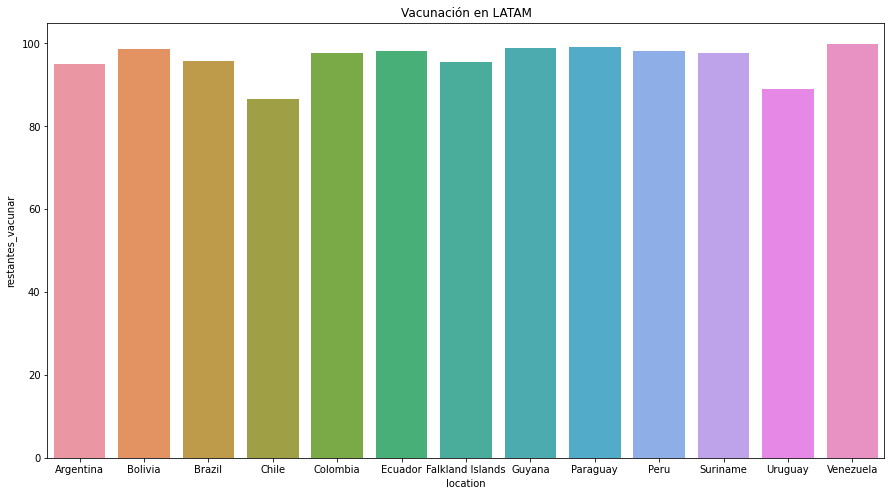

In [93]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="location", y="restantes_vacunar", data=df_latin_america_vacc).set_title('Vacunación en LATAM')


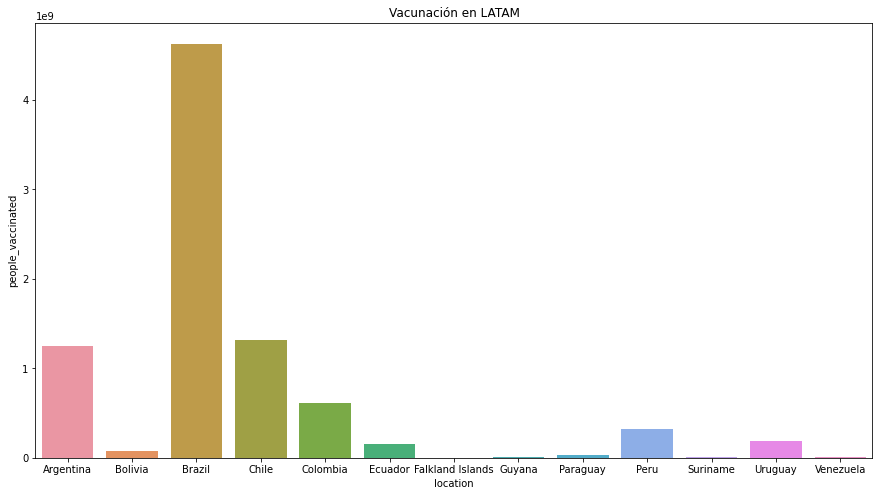

In [94]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="location", y="people_vaccinated", data=df_latin_america_vacc).set_title('Vacunación en LATAM')